In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, roc_curve, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb  
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("adult.csv")

In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
df.shape

(48842, 15)

In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.duplicated().sum()

52

In [9]:
df = df.drop_duplicates()
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [10]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [11]:
df.describe().T

count           mean            std      min       25%  \
age              48790.0      38.652798      13.708493     17.0      28.0   
fnlwgt           48790.0  189668.999365  105617.231232  12285.0  117555.0   
educational-num  48790.0      10.078807       2.570046      1.0       9.0   
capital-gain     48790.0    1080.217688    7455.905921      0.0       0.0   
capital-loss     48790.0      87.595573     403.209129      0.0       0.0   
hours-per-week   48790.0      40.425886      12.392729      1.0      40.0   

                      50%        75%        max  
age                  37.0      48.00       90.0  
fnlwgt           178138.5  237606.25  1490400.0  
educational-num      10.0      12.00       16.0  
capital-gain          0.0       0.00    99999.0  
capital-loss          0.0       0.00     4356.0  
hours-per-week       40.0      45.00       99.0

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [14]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [15]:
df['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [16]:
df['income'].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [17]:
# fill missing values in 'workclass' column with mode
df['workclass'] = df['workclass'].replace('?','Private')

# fill missing values in 'occupation' column with mode
df['occupation'] = df['occupation'].replace('?','Prof-specialty')

# fill missing values in 'native-country' column with mode
df['native-country'] = df['native-country'].replace('?','United-States')

In [18]:
df.head(10)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18           Private  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29           Private  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married     Prof-specialty      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married     Prof-specialty      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K  
8             0             0              40  United-States  <=50K  
9             0             0              10  United-States  <=50K

In [19]:
# education
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
df.education = df.education.replace('HS-grad','High School')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Higher-Education')
df.education = df.education.replace('Bachelors','Under-Grad')
df.education = df.education.replace('Masters','Graduation')
df.education = df.education.replace('Doctorate','Doc')

In [20]:
# marital status
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
df['marital-status'] = df['marital-status'].replace(['Never-married'],'Unmarried')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Single')

In [21]:
# income
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

In [22]:
df.head()

age  workclass  fnlwgt         education  educational-num marital-status  \
0   25    Private  226802            School                7      Unmarried   
1   38    Private   89814       High School                9        Married   
2   28  Local-gov  336951  Higher-Education               12        Married   
3   44    Private  160323  Higher-Education               10        Married   
4   18    Private  103497  Higher-Education               10      Unmarried   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  United-States       0  
1              50  United-States       0  
2              40  United-States       1  
3              40  United-States       1  
4              30  United-States       0

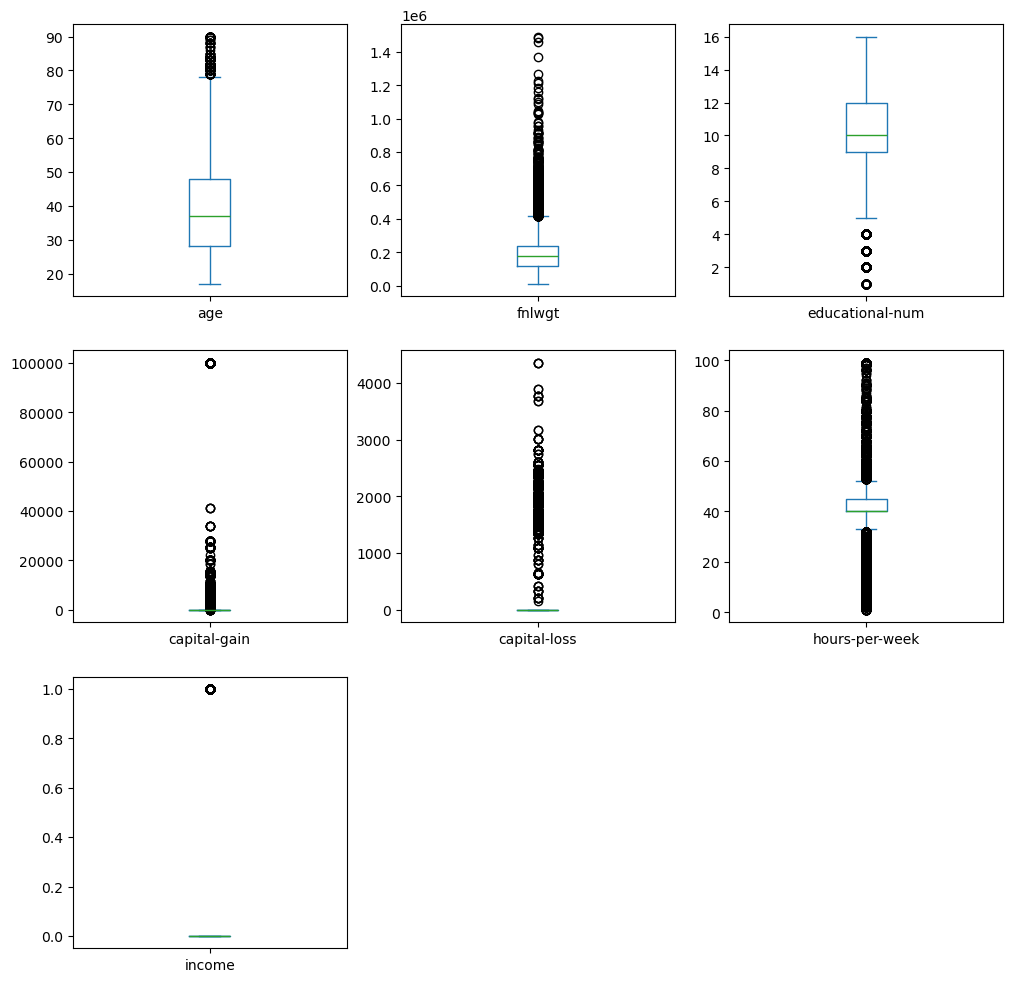

In [23]:
# checking for outliers
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

<Axes: xlabel='age'>

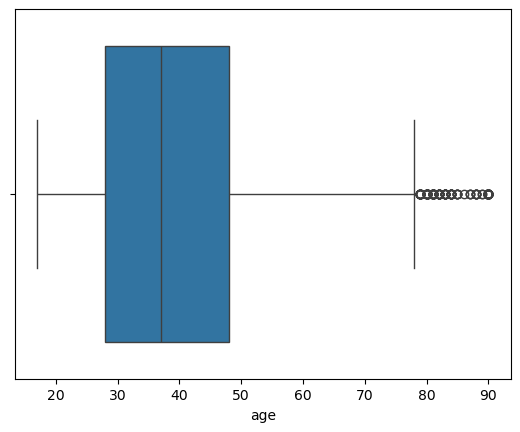

In [24]:
sns.boxplot(data=df,x='age')

In [25]:
def ret_outliers(df):
    q1 = df.quantile(0.25)
    q3 =df.quantile(0.75)
    
    iqr = (q3-q1)
    
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    
    outliers=[]
    
    for i in df:
        if i<lower or i>upper:
            outliers.append(i)
    return outliers

In [26]:
olr = ret_outliers(df['age'])

In [27]:
len(olr)

215

In [28]:
max(olr)

90

In [29]:
min(olr)

79

In [30]:
# the feature age has 193 outliers with max value of 90 and min value of 79
# for working class people generally the age is between 18 to 65, in this we will remove upper limit outliers i.e age>79

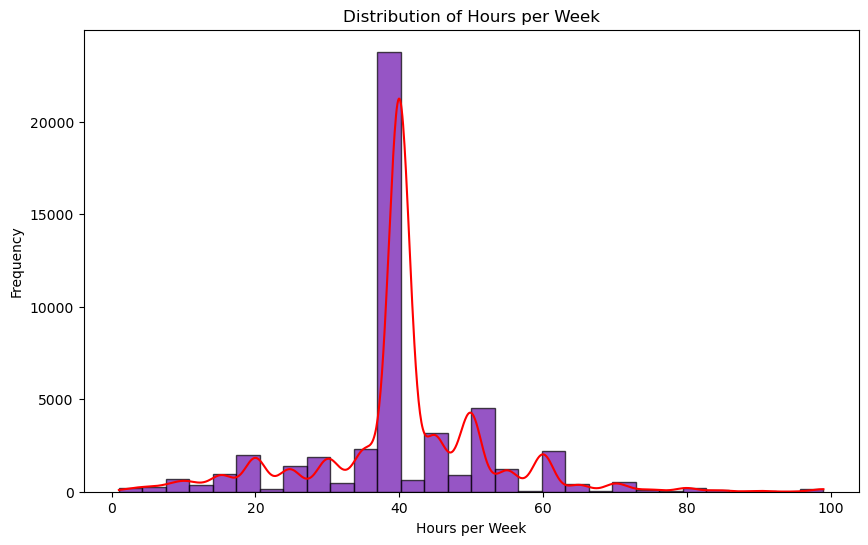

In [31]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['hours-per-week'], bins=30, color='#6A0DAD', edgecolor='black', alpha=0.7)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# Adding a KDE (Kernel Density Estimate) using Matplotlib
from scipy.stats import gaussian_kde

# Calculate the KDE
kde = gaussian_kde(df['hours-per-week'])
x_range = np.linspace(df['hours-per-week'].min(), df['hours-per-week'].max(), 1000)
kde_values = kde(x_range)

# Plot the KDE
plt.plot(x_range, kde_values * len(df['hours-per-week']) * (df['hours-per-week'].max() - df['hours-per-week'].min()) / 30, color='red')

plt.show()

In [32]:
df.drop(df[df['age']>79].index,inplace=True)

In [33]:
df.shape

(48605, 15)

In [34]:
# checking for correlation
numeric_df = df.select_dtypes(include=['int64'])
print(numeric_df)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  income  
0                  40       0  
1                  50       0  
2                  40       1  
3                  40       1  
4                  30       0  
...

In [35]:
numeric_df.corr()

age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.074555         0.036016      0.078164   
fnlwgt          -0.074555  1.000000        -0.039272     -0.003648   
educational-num  0.036016 -0.039272         1.000000      0.125042   
capital-gain     0.078164 -0.003648         0.125042      1.000000   
capital-loss     0.056399 -0.003768         0.081244     -0.031435   
hours-per-week   0.085428 -0.014828         0.142225      0.081902   
income           0.237959 -0.006407         0.332617      0.222578   

                 capital-loss  hours-per-week    income  
age                  0.056399        0.085428  0.237959  
fnlwgt              -0.003768       -0.014828 -0.006407  
educational-num      0.081244        0.142225  0.332617  
capital-gain        -0.031435        0.081902  0.222578  
capital-loss         1.000000        0.054835  0.147994  
hours-per-week       0.054835        1.000000  0.227337  
income               0.147994        0.227337  1.000000

<Axes: >

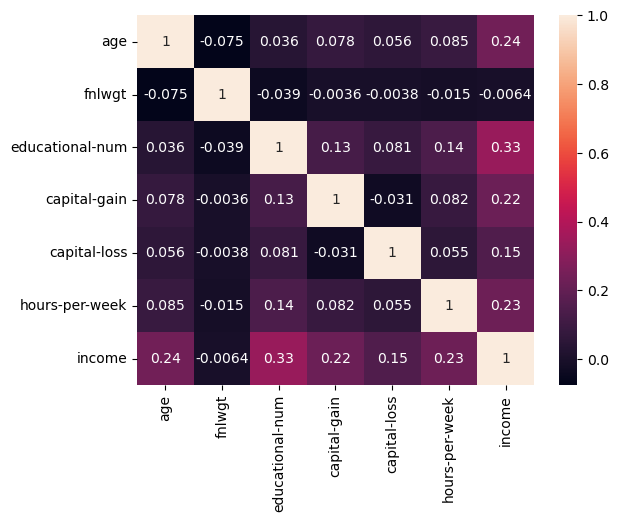

In [36]:
sns.heatmap(numeric_df.corr(),annot=True)

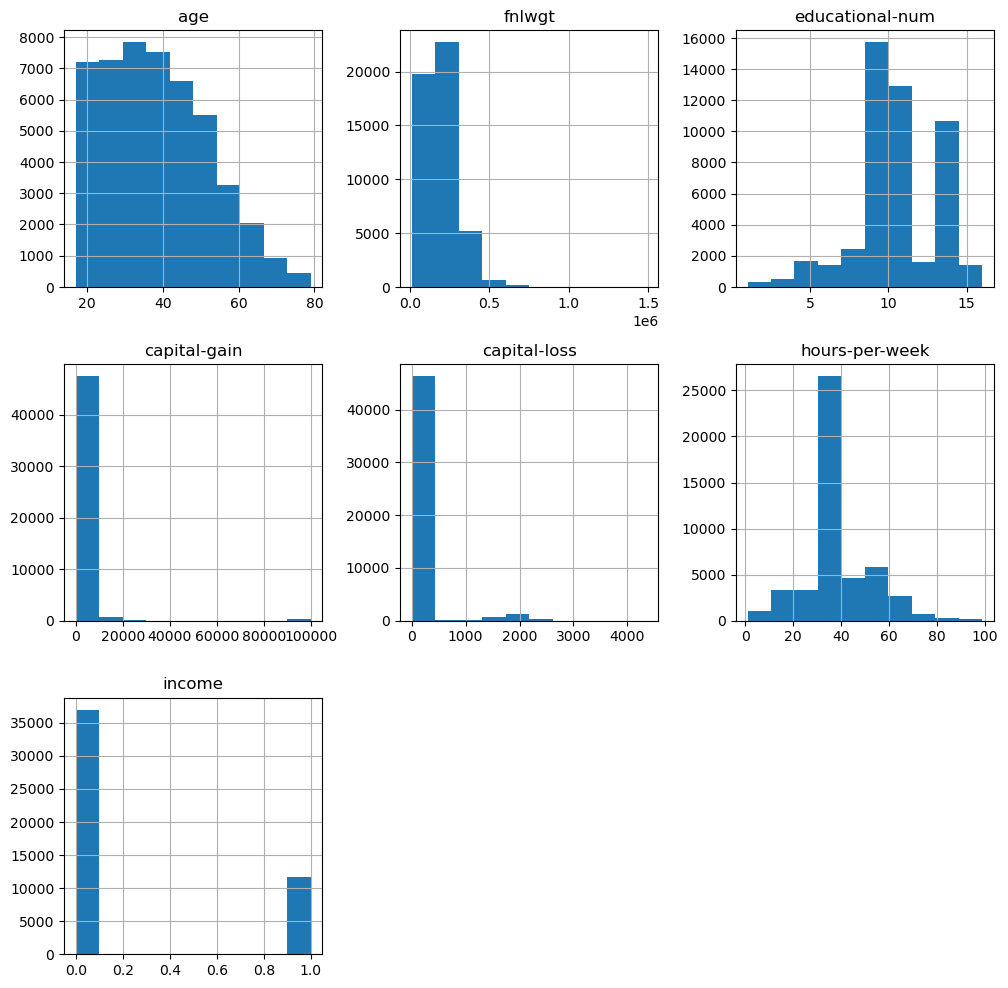

In [37]:
numeric_df.hist(figsize=(12,12),layout=(3,3),sharex=False);

Text(0.5, 1.0, 'Histogram')

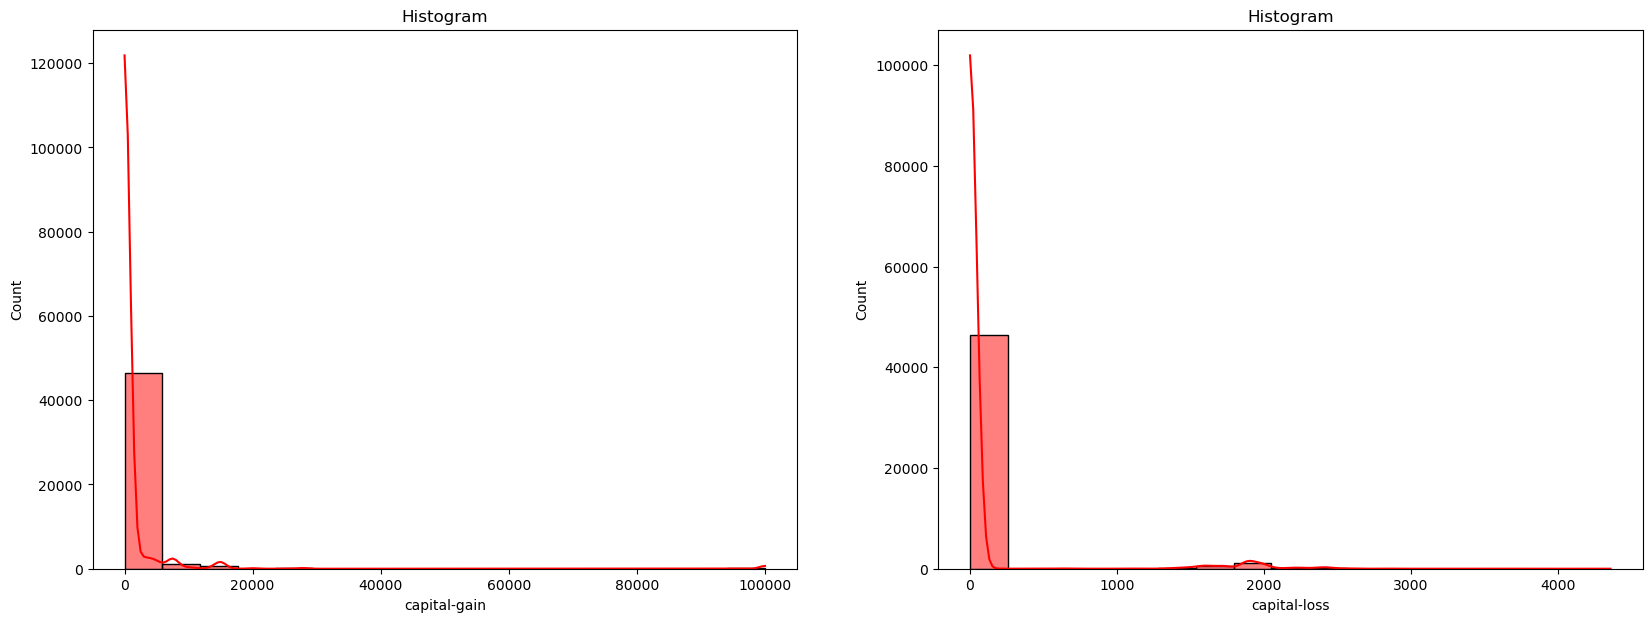

In [38]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

In [39]:
# [ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00
# So, you can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns..i am considering it also
# df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

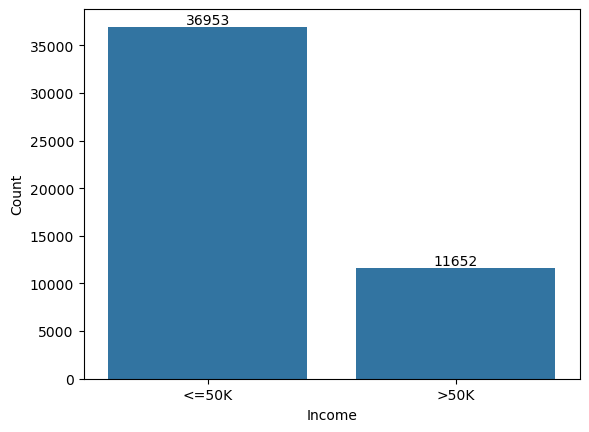

In [40]:
# EDA

ax = sns.countplot(data=df, x='income');
ax.set_xticklabels(['<=50K', '>50K']);
ax.set_xlabel('Income');
ax.set_ylabel('Count');
ax.bar_label(ax.containers[0]);

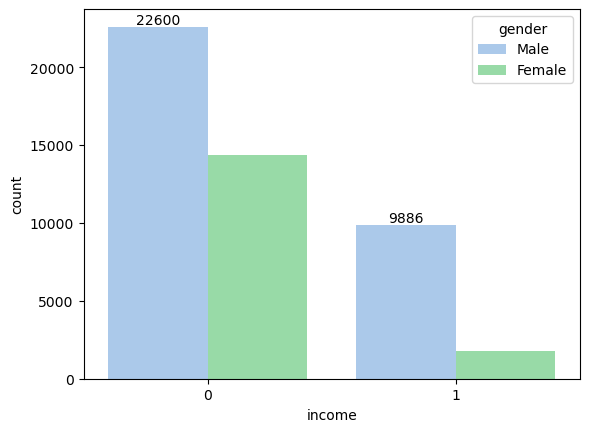

In [41]:
ax = sns.countplot(x=df['income'],palette='pastel6',hue='gender',data=df);
ax.bar_label(ax.containers[0]);

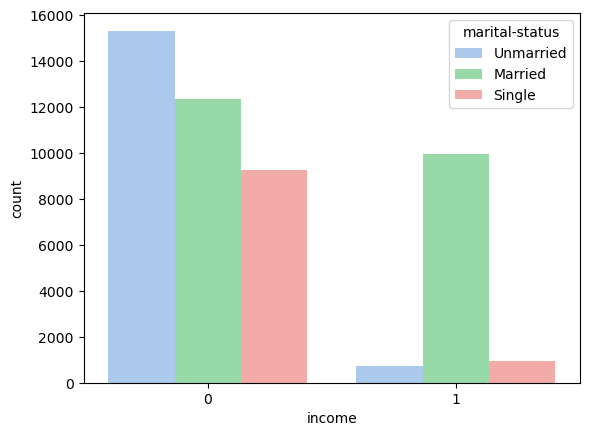

In [42]:
sns.countplot(x=df['income'],palette='pastel6',hue='marital-status',data=df);


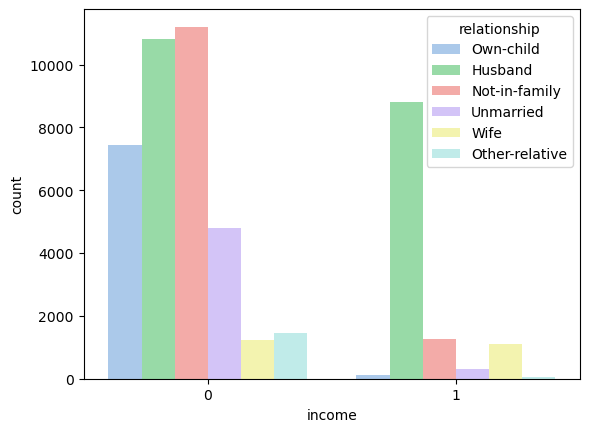

In [43]:
sns.countplot(x=df['income'],palette='pastel6',hue='relationship',data=df);

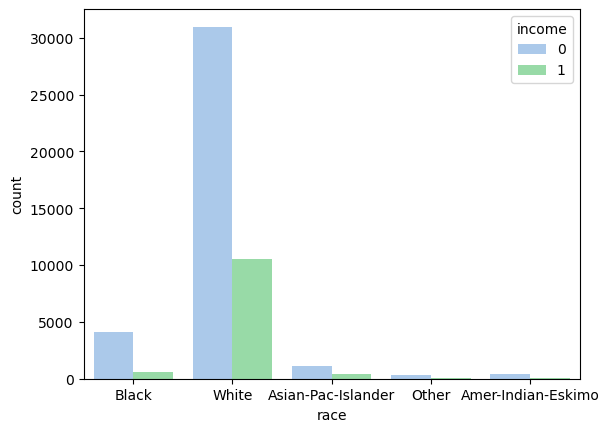

In [44]:
sns.countplot(x=df['race'],hue='income',data=df,palette='pastel6');

In [45]:
income_less_than_50k = df.loc[df.income == 0]
income_more_than_50k = df.loc[df.income == 1]

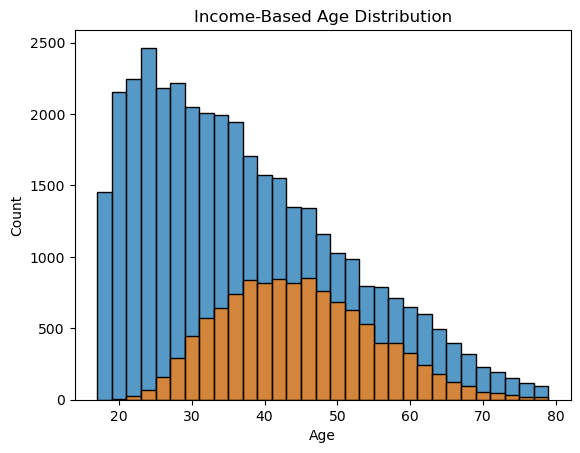

In [46]:
# Age - Income dependency
ax = sns.histplot(data=income_less_than_50k, x='age', binwidth=2);
ax = sns.histplot(data=income_more_than_50k, x='age', binwidth=2);
ax.set_xlabel('Age');
ax.set_title('Income-Based Age Distribution');

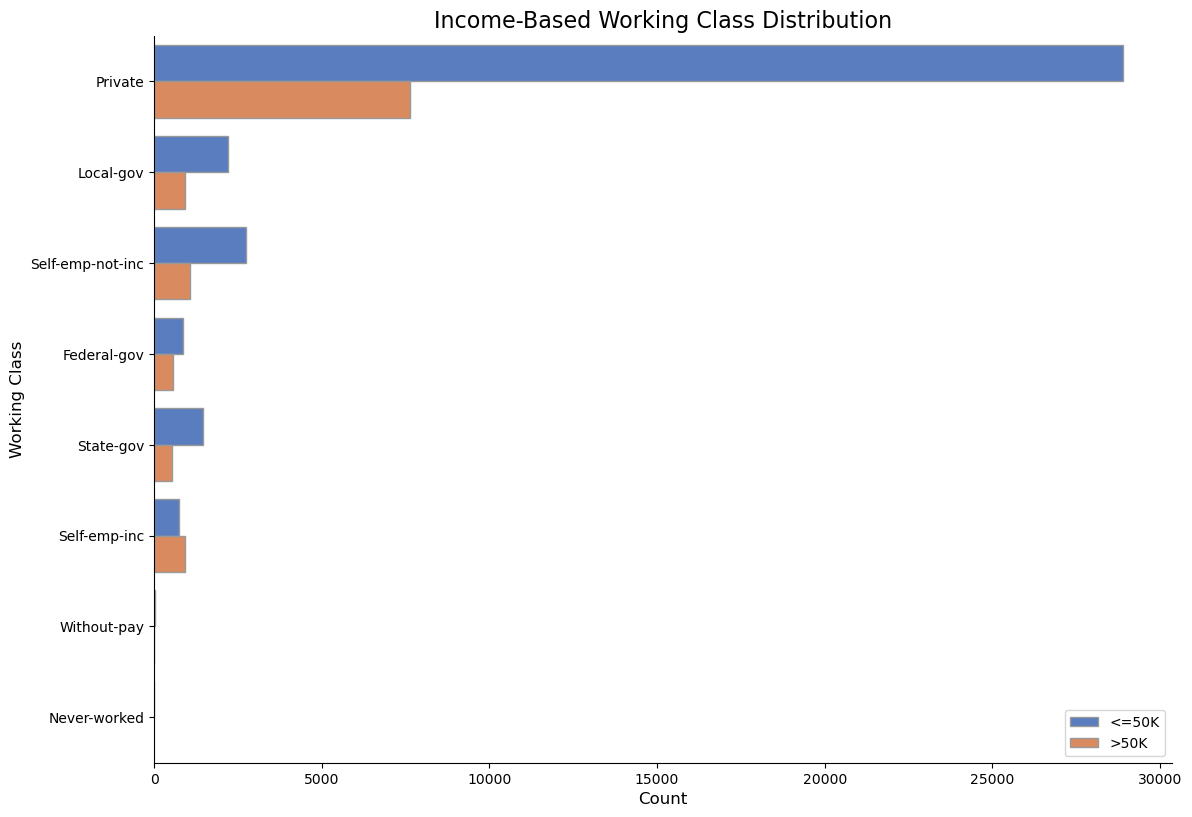

In [47]:
# Workclass -> Income Dependency
# A general term to represent the employment status of an individual
plot = sns.catplot(data=df, y="workclass", hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=8, aspect=1.5);
plot.set_xlabels('Count', fontsize=12);
plot.set_ylabels('Working Class', fontsize=12);
plt.legend(loc='lower right', labels=['<=50K', '>50K']);
plt.title('Income-Based Working Class Distribution', fontsize=16);

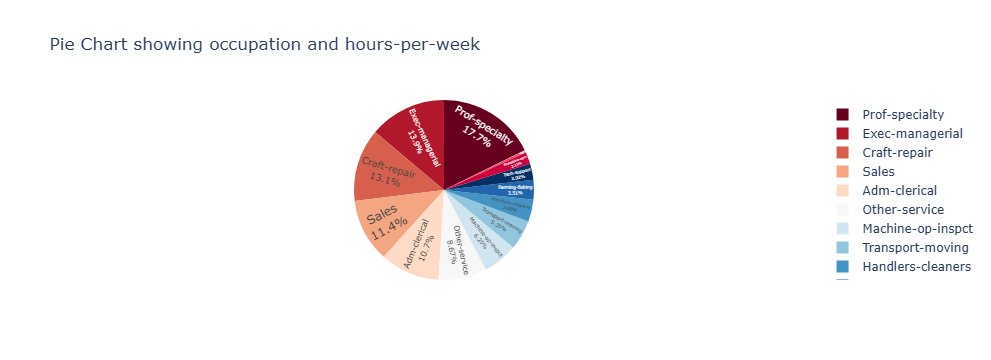

In [48]:
fig = px.pie(df,values='hours-per-week',names='occupation',color_discrete_sequence=px.colors.sequential.RdBu,title
            ='Pie Chart showing occupation and hours-per-week')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

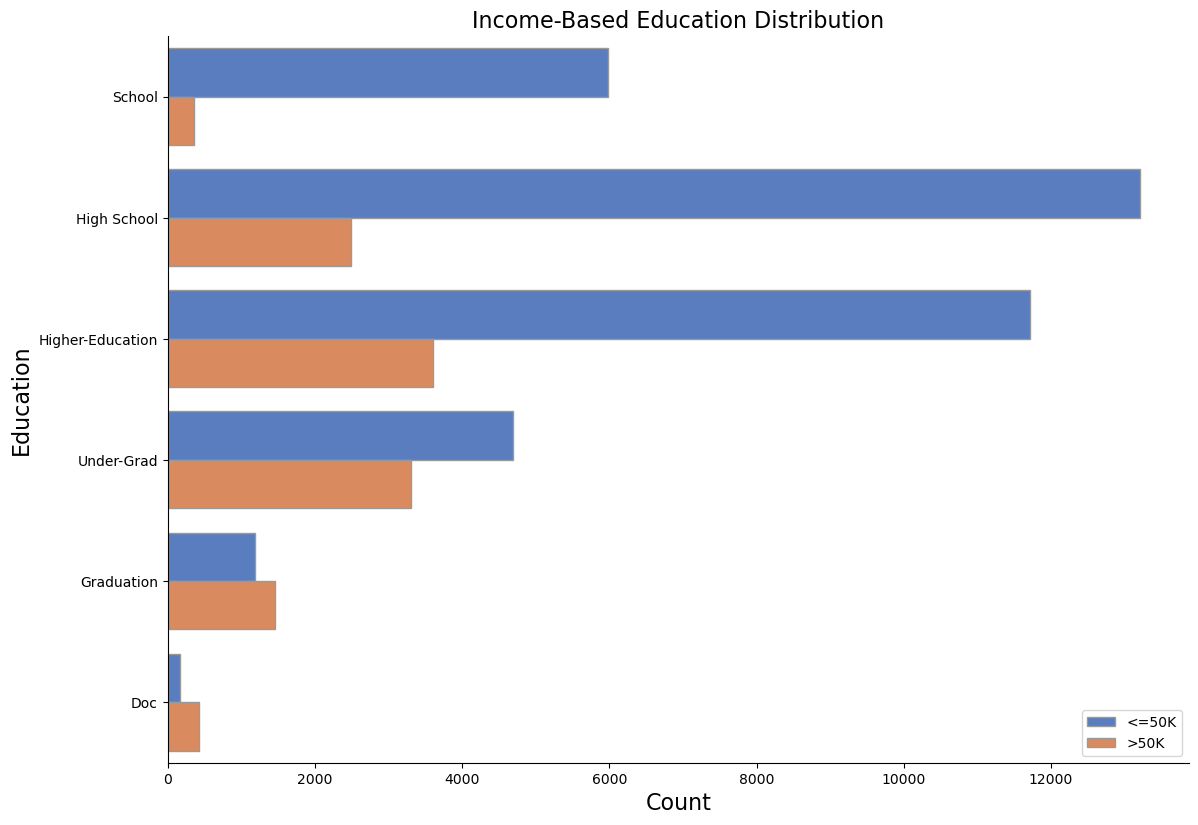

In [49]:
# income - education
plot = sns.catplot(data=df, y="education", hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=8, aspect=1.5);
plot.set_xlabels('Count', fontsize=16);
plot.set_ylabels('Education', fontsize=16);
plt.legend(loc='lower right', labels=['<=50K', '>50K']);
plt.title('Income-Based Education Distribution', fontsize=16);

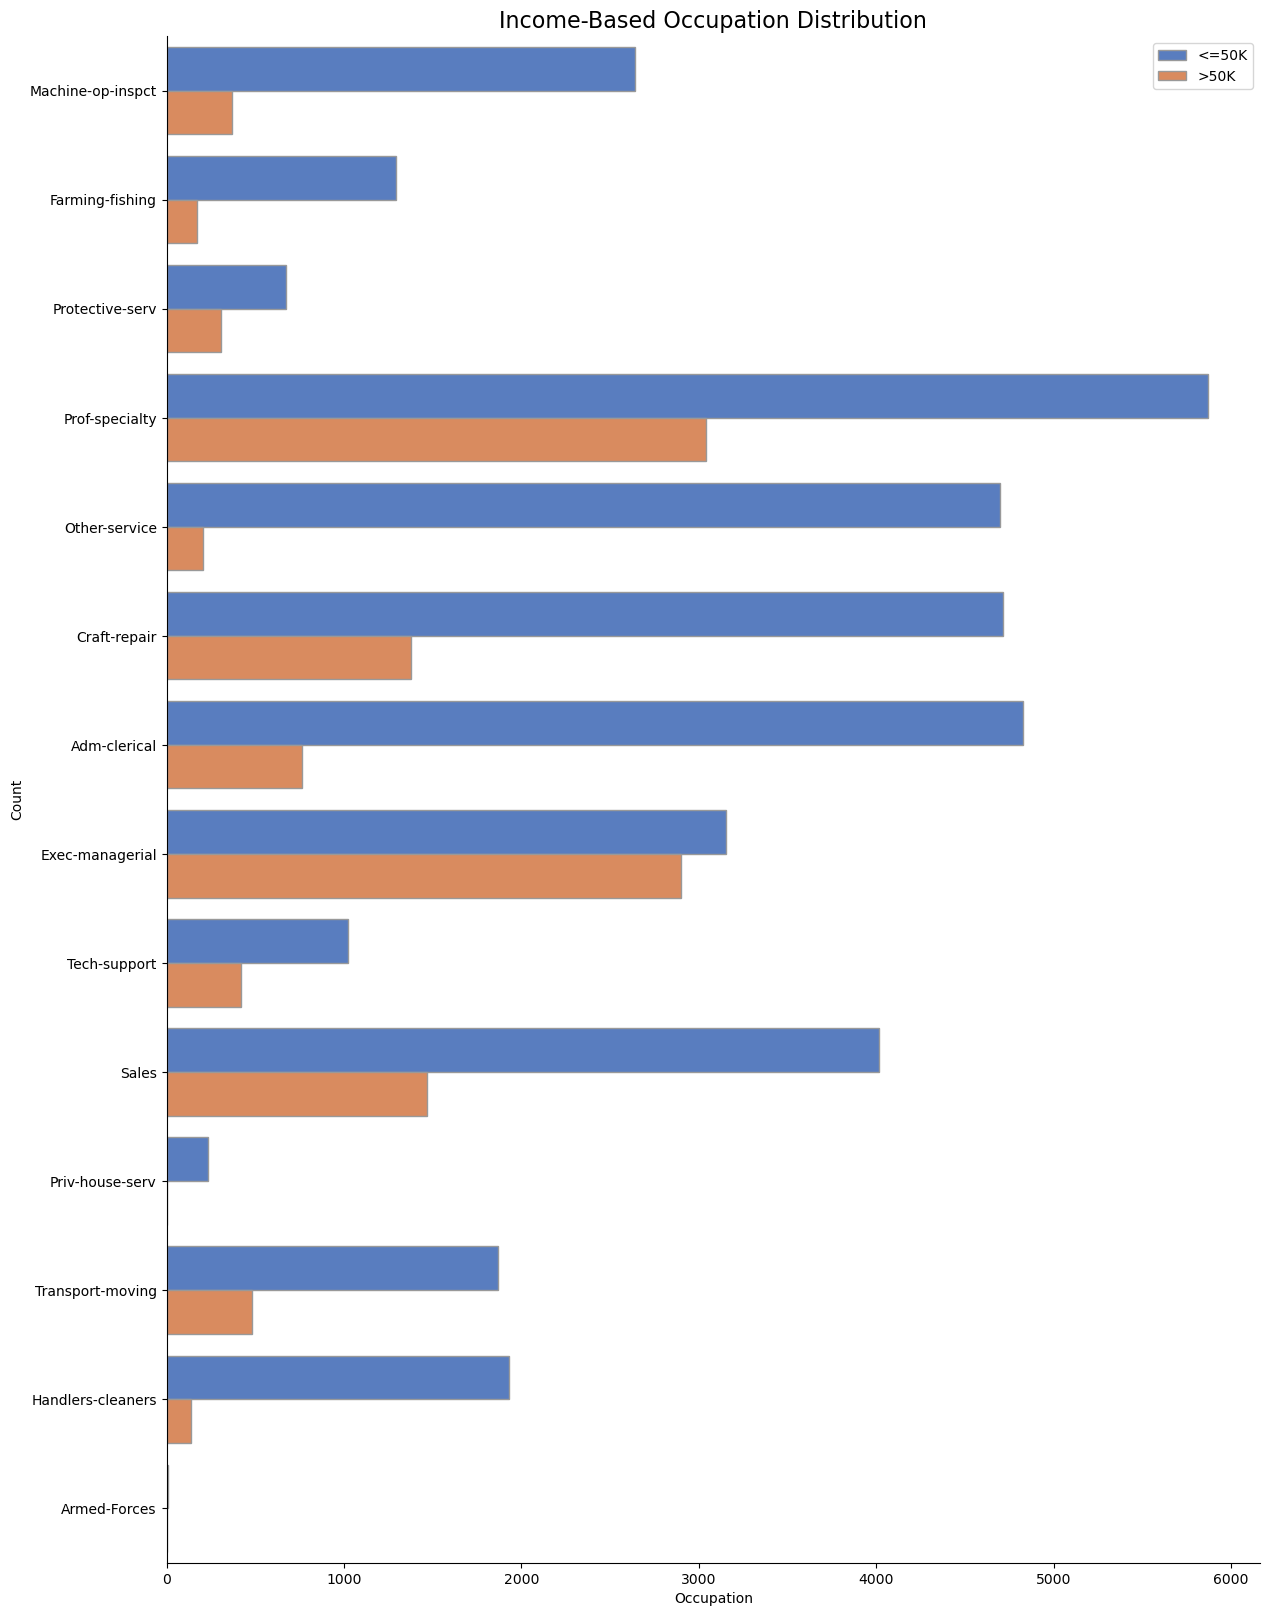

In [50]:
# Occupation -> Income Dependency
plot = sns.catplot(data=df, y='occupation', hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=16, aspect=.8, orient='v');
plot.set_xlabels('Occupation');
plot.set_ylabels('Count');
plt.legend(loc='upper right', labels=['<=50K', '>50K']);
plt.title('Income-Based Occupation Distribution', fontsize=16);

In [51]:
dt = pd.DataFrame(df)

In [52]:
cat_values = list(dt.select_dtypes(include='object').columns)

In [53]:
dt = pd.get_dummies(data=dt,columns=cat_values,drop_first=True,dtype='int')

In [54]:
dt.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   income  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0       0                    0                       0                  1   
1       0                    0                       0                  1   
2       1                    1                       0                  0   
3       1                    0                       0                  1   
4       0                    0                       0                  1   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                        0                           0   
1  ...                        0                           0   
2  ...                        0                           0   
3  ...                        0                           0   
4  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             1                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 84 columns]

In [55]:
dt.shape

(48605, 84)

In [56]:
# Split the dataset into training and testing data

In [57]:
X = dt.drop(['income'], axis=1)

y = dt['income']

In [58]:
X.shape

(48605, 83)

In [59]:
y.shape

(48605,)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

In [61]:
# Standardization

In [62]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [63]:
X_train.shape

(34023, 83)

In [64]:
type(X_train)

numpy.ndarray

## MODEL BUILDING

### KNN CLASSIFIER

In [65]:
# make a dataframe to store the accuracy data of all the models for easy comparison
result=pd.DataFrame(columns=['Model','Accuracy Score'])

In [66]:
knn_clf = KNeighborsClassifier()

# hyperparameter

n_neighbors = list(range(1,20))
metric = ['minkowski']
p=[1,2]
algorithm=['auto']
weights=['uniform','distance']
leaf_size=list(range(1,20))

# putting hyperparameter in form of dictionary

knn_hyperparameters = dict(n_neighbors=n_neighbors,metric=metric,weights=weights,algorithm=algorithm,p=p,leaf_size=leaf_size)
knn_gridsearch=RandomizedSearchCV(estimator=knn_clf,param_distributions=knn_hyperparameters,cv=3,verbose=10)

knn_gridsearch.fit(X_train,y_train)

knn_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=1, p=2, weights=distance
[CV 1/3; 1/10] END algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.789 total time=   2.6s
[CV 2/3; 1/10] START algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=1, p=2, weights=distance
[CV 2/3; 1/10] END algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.790 total time=   2.1s
[CV 3/3; 1/10] START algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=1, p=2, weights=distance
[CV 3/3; 1/10] END algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.789 total time=   2.1s
[CV 1/3; 2/10] START algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=2, weights=distance
[CV 1/3; 2/10] END algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=2, weights=distance;, scor

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 18,
 'metric': 'minkowski',
 'leaf_size': 6,
 'algorithm': 'auto'}

In [67]:
# predict the test results

knn_y_predict = knn_gridsearch.predict(X_test)

# model evaluation : confusion matrix , classification report , accuracy_score

print('\n Confusion Matrix: \n', confusion_matrix(y_test,knn_y_predict))
print('\n Classification Report: \n', classification_report(y_test,knn_y_predict))
knn_accuracy = accuracy_score(y_test,knn_y_predict)

#append the value of accuracy in the dataframe that we created earlier
result.loc[0] = ['KNN classifier',knn_accuracy]
print('\n', result)


 Confusion Matrix: 
 [[10357   769]
 [ 1613  1843]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     11126
           1       0.71      0.53      0.61      3456

    accuracy                           0.84     14582
   macro avg       0.79      0.73      0.75     14582
weighted avg       0.83      0.84      0.83     14582


             Model  Accuracy Score
0  KNN classifier        0.836648


In [68]:
result

Model  Accuracy Score
0  KNN classifier        0.836648

### DECISION TREE

In [69]:
dt_clf = DecisionTreeClassifier()

# hyperparameters

criterion = ['gini','entropy']
splitter = ['best','random']

min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]

max_depth = list(range(10,100,10))
max_features=['auto','sqrt','log2',None]

# putting hyperparameters in form of dictionary

dt_hyperparameters = dict(criterion=criterion, splitter=splitter, min_samples_leaf=min_samples_leaf,
                          min_samples_split=min_samples_split,max_depth=max_depth,max_features=max_features)

dt_gridsearch= RandomizedSearchCV(estimator=dt_clf,param_distributions=dt_hyperparameters,cv=3,verbose=10)

# fit the train in gridSearch

dt_gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 1/3; 1/10] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/3; 1/10] START criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 2/3; 1/10] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/3; 1/10] START criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 3/3; 1/10] END criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/3; 2/10] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=10)

In [70]:
dt_gridsearch.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'gini'}

In [71]:
# evaluation

# predict the test results

dt_y_predict = dt_gridsearch.predict(X_test)

# model evaluation : confusion matrix , classification report , accuracy_score

print('\n Confusion Matrix: \n', confusion_matrix(y_test,dt_y_predict))
print('\n Classification Report: \n', classification_report(y_test,dt_y_predict))
dt_accuracy = accuracy_score(y_test,dt_y_predict)

# append the value of accuracy in the dataframe that we created earlier
result.loc[1] = ['Decision Tree Classifier', dt_accuracy]
print('\n',result)


 Confusion Matrix: 
 [[10286   840]
 [ 1501  1955]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     11126
           1       0.70      0.57      0.63      3456

    accuracy                           0.84     14582
   macro avg       0.79      0.75      0.76     14582
weighted avg       0.83      0.84      0.83     14582


                       Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460


In [72]:
result

Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460

### RANDOM FOREST CLASSIFIER

In [73]:
rf_clf = RandomForestClassifier()

# Hyperparamters

criterion=['gini','entropy']
max_depth = list(range(10,100,10))
min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]

max_features = ['auto','sqrt']
bootstrap=[True,False]

# putting the hyperparameters in a dictionary

rf_hyperparameters = dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,
                          min_samples_split=min_samples_split,max_features=max_features,bootstrap=bootstrap)

rf_gridsearch = RandomizedSearchCV(estimator=rf_clf,param_distributions=rf_hyperparameters,cv=4,verbose=10)

# fit the gridsearch of train data

rf_gridsearch.fit(X_train,y_train)

rf_gridsearch.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4; 1/10] START bootstrap=True, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5
[CV 1/4; 1/10] END bootstrap=True, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/4; 1/10] START bootstrap=True, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5
[CV 2/4; 1/10] END bootstrap=True, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/4; 1/10] START bootstrap=True, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5
[CV 3/4; 1/10] END bootstrap=True, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/4; 1/10] START bootstrap=True, criterion=entropy, max_depth=90, max_feat

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': True}

In [74]:
# evaluation

# predict the test results

rf_y_predict = rf_gridsearch.predict(X_test)

# model evaluation : confusion matrix , classification report , accuracy_score

print('\n Confusion Matrix: \n', confusion_matrix(y_test,rf_y_predict))
print('\n Classification Report: \n', classification_report(y_test,rf_y_predict))
rf_accuracy = accuracy_score(y_test,rf_y_predict)

# append the value of accuracy in the dataframe that we created earlier
result.loc[2] = ['Random Forest Classifier', rf_accuracy]
print('\n',result)


 Confusion Matrix: 
 [[10523   603]
 [ 1353  2103]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.91     11126
           1       0.78      0.61      0.68      3456

    accuracy                           0.87     14582
   macro avg       0.83      0.78      0.80     14582
weighted avg       0.86      0.87      0.86     14582


                       Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460
2  Random Forest Classifier        0.865862


In [75]:
result

Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460
2  Random Forest Classifier        0.865862

### LOGISTIC REGRESSION

In [76]:
lr = LogisticRegression()

# hyperparameters for logistic regression

penalty =['l1','l2','elasticnet',None]
C = np.logspace(-4,4,50)
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
max_iter = [100,500,1000,2000,5000]

lr_hyperparameters = dict(penalty=penalty,C=C,solver=solver,max_iter=max_iter)

lr_gridsearch= RandomizedSearchCV(estimator=lr,param_distributions=lr_hyperparameters,cv=3,verbose=10)

lr_gridsearch.fit(X_train,y_train)

lr_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START C=0.00021209508879201905, max_iter=500, penalty=None, solver=newton-cg
[CV 1/3; 1/10] END C=0.00021209508879201905, max_iter=500, penalty=None, solver=newton-cg;, score=0.853 total time=   0.4s
[CV 2/3; 1/10] START C=0.00021209508879201905, max_iter=500, penalty=None, solver=newton-cg
[CV 2/3; 1/10] END C=0.00021209508879201905, max_iter=500, penalty=None, solver=newton-cg;, score=0.851 total time=   0.3s
[CV 3/3; 1/10] START C=0.00021209508879201905, max_iter=500, penalty=None, solver=newton-cg
[CV 3/3; 1/10] END C=0.00021209508879201905, max_iter=500, penalty=None, solver=newton-cg;, score=0.846 total time=   0.4s
[CV 1/3; 2/10] START C=0.3906939937054613, max_iter=500, penalty=elasticnet, solver=sag
[CV 1/3; 2/10] END C=0.3906939937054613, max_iter=500, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/3; 2/10] START C=0.3906939937054613, max_iter=500, penalty=elasticnet, solver=sag
[

{'solver': 'newton-cg',
 'penalty': None,
 'max_iter': 500,
 'C': 0.00021209508879201905}

In [77]:
# evaluation

# predict the test results

lr_y_predict = lr_gridsearch.predict(X_test)

# model evaluation : confusion matrix , classification report , accuracy_score

print('\n Confusion Matrix: \n', confusion_matrix(y_test,lr_y_predict))
print('\n Classification Report: \n', classification_report(y_test,lr_y_predict))
lr_accuracy = accuracy_score(y_test,lr_y_predict)

# append the value of accuracy in the dataframe that we created earlier
result.loc[3] = ['Logistic Regression', lr_accuracy]
print('\n',result)


 Confusion Matrix: 
 [[10340   786]
 [ 1377  2079]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     11126
           1       0.73      0.60      0.66      3456

    accuracy                           0.85     14582
   macro avg       0.80      0.77      0.78     14582
weighted avg       0.85      0.85      0.85     14582


                       Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460
2  Random Forest Classifier        0.865862
3       Logistic Regression        0.851666


In [78]:
result

Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460
2  Random Forest Classifier        0.865862
3       Logistic Regression        0.851666

### XGBOOST CLASSIFIER

In [79]:
xgb_clf = XGBClassifier()

# hyperparameters

max_depth = [3,6,9,12,15]
learning_rate = [float(x) for x in np.linspace(0.01,0.9,25)]
n_estimators = list(range(100,1000,100))

reg_alpha = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
reg_lambda = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
gamma = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]

booster=['gbtree','gblinear']

# putting the hyperparamters in a dictionary 

xgb_hyperparameters = dict(max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_estimators,reg_alpha=reg_alpha,
                          reg_lambda=reg_lambda,gamma=gamma,booster=booster)

xgb_gridsearch= RandomizedSearchCV(xgb_clf,param_distributions=xgb_hyperparameters,cv=3,verbose=10)

xgb_gridsearch.fit(X_train,y_train)

xgb_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START booster=gbtree, gamma=204.8, learning_rate=0.3066666666666667, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=12.8
[CV 1/3; 1/10] END booster=gbtree, gamma=204.8, learning_rate=0.3066666666666667, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=12.8;, score=0.852 total time=   3.5s
[CV 2/3; 1/10] START booster=gbtree, gamma=204.8, learning_rate=0.3066666666666667, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=12.8
[CV 2/3; 1/10] END booster=gbtree, gamma=204.8, learning_rate=0.3066666666666667, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=12.8;, score=0.845 total time=   3.0s
[CV 3/3; 1/10] START booster=gbtree, gamma=204.8, learning_rate=0.3066666666666667, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=12.8
[CV 3/3; 1/10] END booster=gbtree, gamma=204.8, learning_rate=0.3066666666666667, max_depth=3, n_estimators=900, reg_alpha=0.1, reg_lambda=12.8;, s

{'reg_lambda': 0.4,
 'reg_alpha': 0.8,
 'n_estimators': 200,
 'max_depth': 12,
 'learning_rate': 0.4179166666666667,
 'gamma': 6.4,
 'booster': 'gbtree'}

In [80]:
# evaluation

# predict the test results

xgb_y_predict = xgb_gridsearch.predict(X_test)

# model evaluation : confusion matrix , classification report , accuracy_score

print('\n Confusion Matrix: \n', confusion_matrix(y_test,xgb_y_predict))
print('\n Classification Report: \n', classification_report(y_test,lr_y_predict))
xgb_accuracy = accuracy_score(y_test,xgb_y_predict)

# append the value of accuracy in the dataframe that we created earlier
result.loc[4] = ['XGBoost Classifier', xgb_accuracy]
print('\n',result)


 Confusion Matrix: 
 [[10492   634]
 [ 1197  2259]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     11126
           1       0.73      0.60      0.66      3456

    accuracy                           0.85     14582
   macro avg       0.80      0.77      0.78     14582
weighted avg       0.85      0.85      0.85     14582


                       Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460
2  Random Forest Classifier        0.865862
3       Logistic Regression        0.851666
4        XGBoost Classifier        0.874434


In [81]:
result

Model  Accuracy Score
0            KNN classifier        0.836648
1  Decision Tree Classifier        0.839460
2  Random Forest Classifier        0.865862
3       Logistic Regression        0.851666
4        XGBoost Classifier        0.874434

## Sample Prediction

In [82]:
# Sample input (make sure to match the feature order of the original dataframe)
sample = {
    'age': 25,
    'workclass': 'Private',
    'fnlwgt': 226802,
    'education': '11th',
    'education-num': 7,
    'marital-status': 'Never-married',
    'occupation': 'Machine-op-inspct',
    'relationship': 'Own-child',
    'race': 'Black',
    'gender': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 40,
    'native-country': 'United-States'
}

# Convert sample to DataFrame
sample_df = pd.DataFrame([sample])

# One-Hot Encode the sample input
sample_df = pd.get_dummies(sample_df, columns=cat_values, drop_first=True)

# Align the sample input with the training data
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)

# Standardize the sample input
sample_df = SC.transform(sample_df)

# Predict the income category
sample_prediction = xgb_gridsearch.predict(sample_df)

# Decode the prediction
income_label = ' >50K' if sample_prediction[0] == 1 else ' <=50K'
print("Sample Prediction: Income is", income_label)

Sample Prediction: Income is  <=50K


In [83]:

import pickle

# Save the XGBoost model
with open('XGBClassifier.pkl', 'wb') as file:
    pickle.dump(XGBClassifier, file)


In [84]:
SC = StandardScaler()
with open('scaler.pkl', 'wb') as f:
    pickle.dump(SC, f)
